# Data

## 1. CREMA_D

In [172]:
import os
import pandas as pd

Crema = "/kaggle/input/dataset-ser/Data/CREMA_D/"
Ravdess = "/kaggle/input/dataset-ser/Data/RAVDESS/"
Savee = "/kaggle/input/dataset-ser/Data/SAVEE/"
Tess = "/kaggle/input/dataset-ser/Data/TESS/"


file_emotion = []
file_path = []

# Duyệt qua từng file trong thư mục CREMA_D
for file in os.listdir(Crema):
    if file.endswith(".wav"):
        part = file.split('_')  # VD: 1001_DFA_ANG_XX.wav
        emotion = part[2]       # "ANG"
        file_emotion.append(emotion.lower())  # chuyển về chữ thường: "ang"
        file_path.append(Crema + file)

# Tạo DataFrame
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

Crema_df.head()


,Emotions,Path
0,dis,/kaggle/input/dataset-ser/Data/CREMA_D/1028_TS...
1,hap,/kaggle/input/dataset-ser/Data/CREMA_D/1075_IE...
2,hap,/kaggle/input/dataset-ser/Data/CREMA_D/1084_IT...
3,dis,/kaggle/input/dataset-ser/Data/CREMA_D/1067_IW...
4,dis,/kaggle/input/dataset-ser/Data/CREMA_D/1066_TI...


In [173]:
Crema_df['Emotions'].value_counts()

Emotions
dis    1271
hap    1271
sad    1271
fea    1271
ang    1271
neu    1087
Name: count, dtype: int64

## 2. Ravdess

In [174]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # Có 24 diễn viên
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # Phần tử thứ 3 là cảm xúc
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
})
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
1,neutral,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
2,disgust,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
3,disgust,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
4,neutral,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...


In [175]:
Ravdess_df['Emotions'].value_counts()

Emotions
surprise    192
disgust     192
fear        192
sad         192
calm        192
happy       192
angry       192
neutral      96
Name: count, dtype: int64

## 3. SAVEE

In [176]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/dataset-ser/Data/SAVEE/JE_h09.wav
1,fear,/kaggle/input/dataset-ser/Data/SAVEE/KL_f12.wav
2,happy,/kaggle/input/dataset-ser/Data/SAVEE/DC_h03.wav
3,disgust,/kaggle/input/dataset-ser/Data/SAVEE/DC_d04.wav
4,angry,/kaggle/input/dataset-ser/Data/SAVEE/KL_a14.wav


In [177]:
Savee_df['Emotions'].value_counts()


Emotions
neutral     120
happy        60
fear         60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64

##  4. TESS

In [178]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/kaggle/input/dataset-ser/Data/TESS/YAF_fear/Y...
1,fear,/kaggle/input/dataset-ser/Data/TESS/YAF_fear/Y...
2,fear,/kaggle/input/dataset-ser/Data/TESS/YAF_fear/Y...
3,fear,/kaggle/input/dataset-ser/Data/TESS/YAF_fear/Y...
4,fear,/kaggle/input/dataset-ser/Data/TESS/YAF_fear/Y...


In [179]:
Tess_df['Emotions'].value_counts()


Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64

**Concatenate all 4 datasets and see the numbers of classes**


In [180]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
1,neutral,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
2,disgust,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
3,disgust,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...
4,neutral,/kaggle/input/dataset-ser/Data/RAVDESS/Actor_0...


In [181]:
data_path['Emotions'].value_counts().sum()

12162

In [182]:
data_path['Emotions'].value_counts()


Emotions
sad         1923
dis         1271
hap         1271
fea         1271
ang         1271
neu         1087
surprise     652
disgust      652
fear         652
happy        652
angry        652
neutral      616
calm         192
Name: count, dtype: int64

In [183]:
data_path['Emotions'] = data_path['Emotions'].replace({
    'hap': 'happy',
    'fea': 'fear',
    'dis': 'disgust',
    'ang': 'angry',
    'neu': 'neutral'
})


In [184]:
data_path['Emotions'].value_counts()

Emotions
disgust     1923
fear        1923
sad         1923
happy       1923
angry       1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

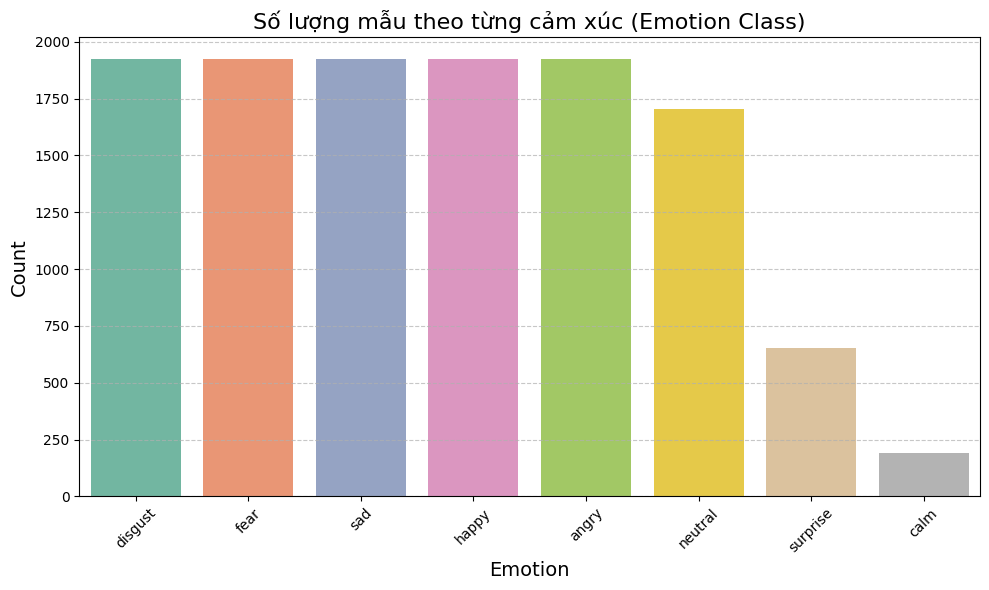

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượng mỗi class trong cột 'Emotions'
emotion_counts = data_path['Emotions'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
sns.barplot(data=emotion_counts, x='Emotion', y='Count', palette='Set2')
plt.title('Số lượng mẫu theo từng cảm xúc (Emotion Class)', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Preprocess


## Split train - dev - test

In [186]:
from sklearn.model_selection import train_test_split
# Chia train,dev,test
# Đảm bảo phân phối cảm xúc được giữ đều (stratify)
train_df, temp_df = train_test_split( # temp_df = test + dev = 30 % data
    data_path, 
    test_size=0.3, 
    stratify=data_path['Emotions'], 
    random_state=42
)

dev_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['Emotions'],
    random_state=42
)


In [187]:
train_df['Emotions'].value_counts()

Emotions
angry       1346
sad         1346
fear        1346
disgust     1346
happy       1346
neutral     1192
surprise     456
calm         135
Name: count, dtype: int64

## Augment tập train

In [188]:
# import os
# import shutil

# # Xóa toàn bộ file và thư mục trong /kaggle/working
# for f in os.listdir("/kaggle/working"):
#     path = os.path.join("/kaggle/working", f)
#     if os.path.isfile(path):
#         os.remove(path)
#     else:
#         shutil.rmtree(path)


In [189]:
import librosa
import soundfile as sf
import os
# Augment trên tập train
import librosa
import numpy as np
import soundfile as sf
import os

def augment_audio(path, output_dir, suffix=None):
    try:
        y, sr = librosa.load(path, sr=None)
        
        # 1. Add noise
        noise = 0.005 * np.random.randn(len(y))
        y_noise = y + noise

        # 2. Time stretch
        y_stretch = librosa.effects.time_stretch(y, rate=0.8)
        # Cắt hoặc pad để khớp độ dài
        if len(y_stretch) > len(y):
            y_stretch = y_stretch[:len(y)]
        else:
            y_stretch = np.pad(y_stretch, (0, len(y) - len(y_stretch)))

        # 3. Pitch shift
        y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)

        base = os.path.splitext(os.path.basename(path))[0]  # bỏ .wav
        if suffix:
            base += f"_{suffix}"

        # Lưu file
        sf.write(f"{output_dir}/{base}_noise.wav", y_noise, sr)
        sf.write(f"{output_dir}/{base}_stretch.wav", y_stretch, sr)
        sf.write(f"{output_dir}/{base}_pitch.wav", y_pitch, sr)

    except Exception as e:
        print(f"Lỗi augment file {path}: {e}")



In [190]:
# Đặt mục tiêu augment cho từng class của tập train
target_size = 1300
aug_dir = "/kaggle/working/aug_audio_balanced"
os.makedirs(augmented_dir, exist_ok=True)


In [191]:
from collections import Counter
import random

# Đếm số mẫu theo nhãn trong tập train
class_counts = Counter(train_df['Emotions'])

# Chỉ augment cho 3 class cần thiết
for emotion in ['neutral', 'surprise', 'calm']:
    samples = train_df[train_df['Emotions'] == emotion]['Path'].tolist()
    current = class_counts[emotion]
    needed = target_size - current
    
    print(f"Augmenting '{emotion}' — need {needed} more samples...")

    i = 0
    while needed > 0:
        path = samples[i % len(samples)]  # quay vòng qua file gốc
        augment_audio(path, aug_dir)
        needed -= 3  # mỗi lần augment tạo 3 file
        i += 1

Augmenting 'neutral' — need 108 more samples...
Augmenting 'surprise' — need 844 more samples...
Augmenting 'calm' — need 1165 more samples...


In [192]:
# Mapping từ tên gốc sang cảm xúc
filename_to_emotion = {
    os.path.splitext(os.path.basename(row['Path']))[0]: row['Emotions']
    for _, row in train_df.iterrows()
}

def get_emotion_from_aug_name(filename):
    base = os.path.splitext(os.path.basename(filename))[0]  # 1001_DFA_ANG_XX_noise
    for suffix in ['_noise', '_pitch', '_stretch']:
        if base.endswith(suffix):
            base = base.replace(suffix, '')  # remove suffix
    return filename_to_emotion.get(base, 'unknown')


# Tạo aug_df với nhãn đúng
aug_paths = glob.glob(f"{augmented_dir}/*.wav")

aug_df = pd.DataFrame({
    'Path': aug_paths,
    'Emotions': [get_emotion_from_aug_name(p) for p in aug_paths]
})

# Gộp lại train mới
train_aug_df = pd.concat([train_df, aug_df], ignore_index=True)

In [193]:
train_aug_df['Emotions'].value_counts()

Emotions
angry       1346
sad         1346
fear        1346
disgust     1346
happy       1346
surprise    1302
neutral     1300
calm         540
Name: count, dtype: int64

## Trích MFCC cho từng tập
- Mô hình (CNN, LSTM, MLP...) không thể xử lý trực tiếp file âm thanh (.wav).
- Chỉ nhận đầu vào là đặc trưng số học — như MFCC
- X_train, X_dev, X_test sẽ là mảng MFCC (shape: 40 × 862)

In [195]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm


def extract_mfcc(file_path, n_mfcc=40, max_pad_len=862):
    try:
        audio, sr = librosa.load(file_path, sr=None)  # Giữ orginal sampling rate
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        
        # Padding or cutting
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
            
        return mfcc
    except Exception as e:
        print(f"File error {file_path}: {e}")
        return None


In [196]:
# Trích MFCC cho train_aug_df
X_train = []
y_train = []

for i, row in tqdm(train_aug_df.iterrows(), total=len(train_aug_df)):
    mfcc = extract_mfcc(row['Path'])
    if mfcc is not None:
        X_train.append(mfcc)
        y_train.append(row['Emotions'])


100%|██████████| 9872/9872 [02:40<00:00, 61.38it/s]


In [197]:
# Trích MFCC cho dev_df
X_dev = []
y_dev = []

for i, row in tqdm(dev_df.iterrows(), total=len(dev_df)):
    mfcc = extract_mfcc(row['Path'])
    if mfcc is not None:
        X_dev.append(mfcc)
        y_dev.append(row['Emotions'])

100%|██████████| 1824/1824 [00:30<00:00, 59.45it/s]


In [198]:
# Trích MFCC cho test_df
X_test = []
y_test = []

for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
    mfcc = extract_mfcc(row['Path'])
    if mfcc is not None:
        X_test.append(mfcc)
        y_test.append(row['Emotions'])


100%|██████████| 1825/1825 [00:30<00:00, 59.28it/s]


In [199]:
np.save("X_train.npy", np.array(X_train))
np.save("y_train.npy", np.array(y_train))

np.save("X_dev.npy", np.array(X_dev))
np.save("y_dev.npy", np.array(y_dev))

np.save("X_test.npy", np.array(X_test))
np.save("y_test.npy", np.array(y_test))


# Encode

In [200]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode tất cả cùng 1 label encoder để đảm bảo mapping thống nhất
le = LabelEncoder()
le.fit(y_train)  # Fit trên tập train thôi

y_train_enc = le.transform(y_train)
y_dev_enc = le.transform(y_dev)
y_test_enc = le.transform(y_test)

# One-hot
y_train_ohe = to_categorical(y_train_enc)
y_dev_ohe = to_categorical(y_dev_enc)
y_test_ohe = to_categorical(y_test_enc)

# Lưu
np.save("y_train_enc.npy", y_train_enc)
np.save("y_dev_enc.npy", y_dev_enc)
np.save("y_test_enc.npy", y_test_enc)

np.save("y_train_ohe.npy", y_train_ohe)
np.save("y_dev_ohe.npy", y_dev_ohe)
np.save("y_test_ohe.npy", y_test_ohe)

# In mapping
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


2025-07-02 17:47:08.218179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751478428.501995      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751478428.588100      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Label mapping: {'angry': 0, 'calm': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}


In [210]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.layers import Reshape, BatchNormalization
# CNN + LSTM


def build_custom_model(input_shape=(40, 862, 1), num_classes=8, dropout_rate=0.3, units_lstm=128):
    
    inputs = Input(shape=input_shape)
    """
    Builds a CNN + LSTM model for speech emotion recognition using MFCC input.

    Parameters:
        input_shape (tuple): Shape of the input data (height, width, channels)
        num_classes (int): Number of emotion classes to classify

    Returns:
        model (Model): Compiled Keras model
    """

    inputs = Input(shape=input_shape)

    # CNN Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # CNN Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Reshape CNN output for LSTM input
    # From (batch_size, height, width, channels) to (batch_size, time_steps, features)
    x = Reshape((x.shape[1], x.shape[2] * x.shape[3]))(x)

    # LSTM Layer
    x = LSTM(128, return_sequences=False)(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    return model


In [214]:
import numpy as np, random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Dùng random searching tìm kiếm siêu tham số cho model
# Load
X_train = np.load("/kaggle/working/X_train.npy")[..., np.newaxis]
X_val   = np.load("/kaggle/working/X_dev.npy")[..., np.newaxis]
X_test  = np.load("/kaggle/working/X_test.npy")[..., np.newaxis]

y_train = np.load("/kaggle/working/y_train_ohe.npy")
y_val   = np.load("/kaggle/working/y_dev_ohe.npy")
y_test  = np.load("/kaggle/working/y_test_ohe.npy")

# Random search space
param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate': [1e-4, 5e-4, 1e-3],
    'dropout_rate': [0.2, 0.3, 0.4],
    'units_lstm': [64, 128, 256],
    'patience': [3,5],
    'epochs': [10, 15, 20],
}

results = []

for trial in range(5):
    params = {k: random.choice(v) for k, v in param_grid.items()}
    print(f"\n🔍 Trial {trial+1}: {params}")

    model = build_custom_model(
        input_shape=(40, 862, 1),
        num_classes=y_train.shape[1],
        dropout_rate=params['dropout_rate'],
        units_lstm=params['units_lstm']
    )

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    checkpoint = ModelCheckpoint(f"model_trial_{trial+1}.h5", monitor='val_accuracy', save_best_only=True, verbose=0)
    early_stop = EarlyStopping(monitor='val_loss', patience=params['patience'], restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[checkpoint, early_stop, reduce_lr],
        verbose=0
    )

    best_val_acc = max(history.history['val_accuracy'])
    print(f"✅ Best val_accuracy: {best_val_acc:.4f}")
    results.append((trial + 1, best_val_acc, params))

# Xếp hạng các cấu hình
results.sort(key=lambda x: x[1], reverse=True)
for trial_id, acc, config in results:
    print(f"🥇 Trial {trial_id}: {acc:.4f} with config {config}")
# ----------------------- Code lâu nên đã dừng -----------------------------


🔍 Trial 1: {'batch_size': 16, 'learning_rate': 0.001, 'dropout_rate': 0.2, 'units_lstm': 64, 'patience': 3, 'epochs': 10}


KeyboardInterrupt: 

In [215]:
import numpy as np, random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Load
X_train = np.load("/kaggle/working/X_train.npy")[..., np.newaxis]
X_val   = np.load("/kaggle/working/X_dev.npy")[..., np.newaxis]
X_test  = np.load("/kaggle/working/X_test.npy")[..., np.newaxis]

y_train = np.load("/kaggle/working/y_train_ohe.npy")
y_val   = np.load("/kaggle/working/y_dev_ohe.npy")
y_test  = np.load("/kaggle/working/y_test_ohe.npy")

model = build_model()
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

# Đánh giá trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {test_acc:.4f}")

Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 603s 2s/step - accuracy: 0.3012 - loss: 1.8000 - val_accuracy: 0.4189 - val_loss: 1.4755
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.4511 - loss: 1.4589 - val_accuracy: 0.4397 - val_loss: 1.3786
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.4980 - loss: 1.3000 - val_accuracy: 0.4342 - val_loss: 1.4174
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.5336 - loss: 1.2175 - val_accuracy: 0.4934 - val_loss: 1.2922
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.5550 - loss: 1.1600 - val_accuracy: 0.4770 - val_loss: 1.3070
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.5786 - loss: 1.0919 - val_accuracy: 0.4803 - val_loss: 1.3101
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.5902 - loss: 1.0573 - val_accuracy: 0.5000 - val_loss: 1.2463
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step - accuracy: 0.6110 - loss: 1.0177 - val_accu

# Evaluate Model

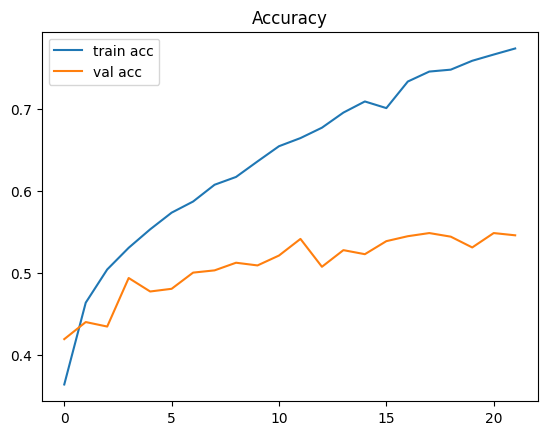

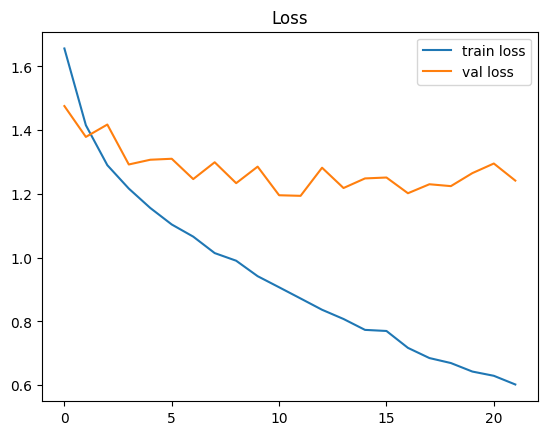

In [216]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
